## Arbeitnehmer Ausbildung

In [1]:
#Imports

import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np
import modules

Spalten laden:

In [2]:
col_list=['foreign_worker_info_education' , 'foreign_worker_info_education_other' ,
          'fw_info_alt_edu_experience' , 'fw_info_education_other', 'case_status']
visas_df = pd.read_csv("data/us_perm_visas.csv" , usecols=col_list)

C:\Users\alina\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,39,41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Welche Zeilen haben Werte und welche Werte?

case_status
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows

foreign_worker_info_education
239053/374362 64%
Filled: |███████████████████████████████-------------------| 63.9% Rows

foreign_worker_info_education_other
3940/374362 1%
Filled: |--------------------------------------------------| 1.1% Rows

fw_info_alt_edu_experience
150446/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows

fw_info_education_other
150015/374362 40%
Filled: |████████████████████------------------------------| 40.1% Rows



C:\Users\alina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_

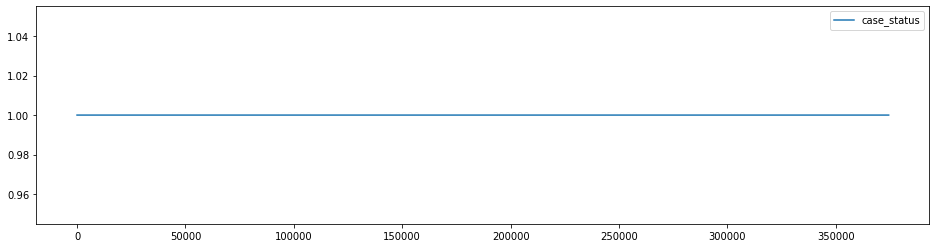

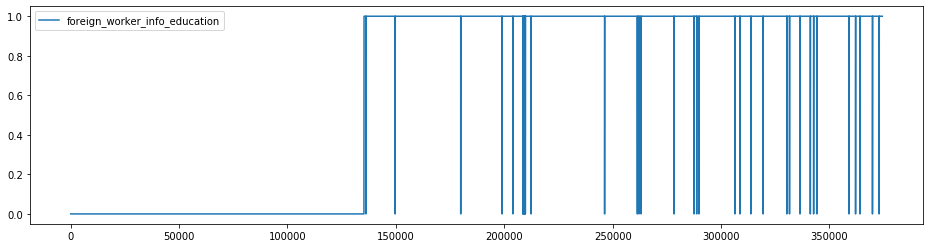

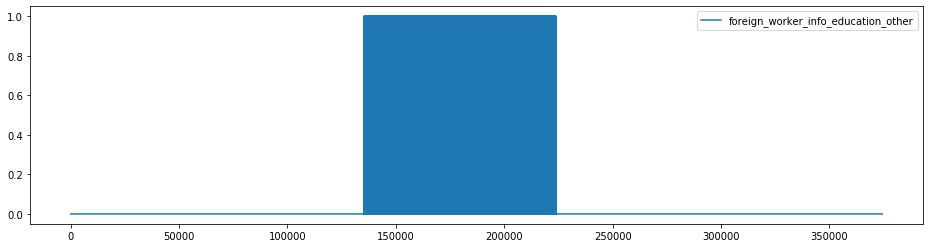

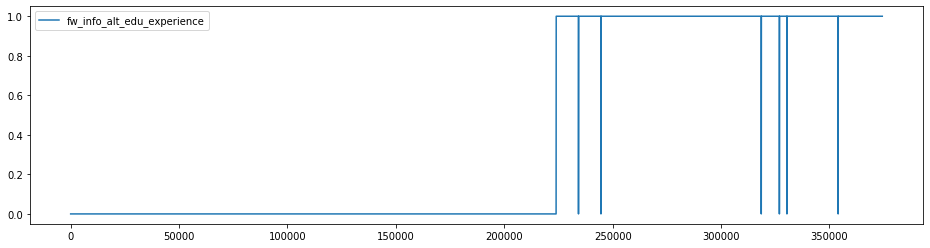

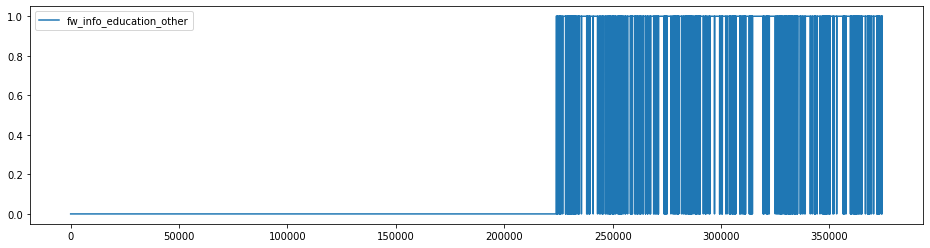

,case_status,foreign_worker_info_education,foreign_worker_info_education_other,fw_info_alt_edu_experience,fw_info_education_other
150503,Certified,Master's,NaN,NaN,NaN
287578,Certified,None,NaN,A,None
64902,Certified-Expired,NaN,NaN,NaN,NaN
31124,Certified-Expired,NaN,NaN,NaN,NaN
160100,Certified-Expired,Bachelor's,NaN,NaN,NaN
96939,Certified,NaN,NaN,NaN,NaN
182496,Certified,Bachelor's,NaN,NaN,NaN
301502,Certified,Master's,NaN,A,None
284401,Certified-Expired,Master's,NaN,N,None
190389,Certified,Master's,NaN,NaN,NaN


In [3]:
modules.print_count_of_values_relation(visas_df, True, True)
visas_df.sample(10)

In [4]:
visas_df['foreign_worker_info_education'].value_counts()

Master's       103662
Bachelor's      87686
None            18344
Doctorate       12243
Other           10245
High School      4536
Associate's      2337
Name: foreign_worker_info_education, dtype: int64

In [5]:
visas_df['foreign_worker_info_education_other'].value_counts()

MEDICAL DEGREE                                                                402
MD                                                                            247
M.D.                                                                          163
3-YR POST SECONDARY EDUCATION *SEE H.14                                       146
3-YR POST SECONDARY EDUCATION *SEE H-14                                       130
                                                                             ... 
3 YEARS OF UNIVERSITY-LEVEL STUDY + 2 YEARS OF EXPERIENCE (SEE SECT. H.14)      1
COURSEWORK                                                                      1
JOURNEYMAN LICENSE                                                              1
BACHELOR'S DEGREE (3 YR) EQUIVALENT TO A 4 YR US DEGREE WITH EXPERIENCE         1
CHARTERED MEMBER                                                                1
Name: foreign_worker_info_education_other, Length: 1327, dtype: int64

In [6]:
visas_df['fw_info_alt_edu_experience'].value_counts()

A    109413
Y     24593
N     16440
Name: fw_info_alt_edu_experience, dtype: int64

In [7]:
visas_df['fw_info_education_other'].value_counts()

None                                                                                                  143672
MEDICAL DEGREE                                                                                           639
MD                                                                                                       393
M.D.                                                                                                     239
3-YR POST SECONDARY EDUCATION *SEE H.14                                                                  191
                                                                                                       ...  
PROFESSIONAL DEGREE/DMD                                                                                    1
THREE YEAR POST-SECONDARY DIPLOMA                                                                          1
EQUIVALENT 3 YEARS OF ACADEMIC STUDIES TOWARD BACHELOR OF SCIENCE DEGREE                                   1
BACHELOR OF LAWS ( 

Ergebnis: foreign_worker_info_education gibt den Abschluss aus,
foreign_worker_info_education_other und fw_info_eduaction_other haben offensichtlich ergänzende Werte,
fw_info_alt_edu_experience entspricht einem Code.

--> Wir möchten die Abschlüsse genauer ansehen und mergen die zwei Spalten:

## Zuerst wird bereinigt:

In [8]:
visas_df['foreign_worker_info_education'] = visas_df['foreign_worker_info_education'].replace(r'^\s*$', np.nan, regex=True)
visas_df['foreign_worker_info_education_other'] = visas_df['foreign_worker_info_education_other'].replace(r'^\s*$', np.nan, regex=True)
visas_df['fw_info_alt_edu_experience'] = visas_df['fw_info_alt_edu_experience'].replace(r'^\s*$', np.nan, regex=True)
visas_df['fw_info_education_other'] = visas_df['fw_info_education_other'].replace(r'^\s*$', np.nan, regex=True)

In [9]:
visas_df['foreign_worker_info_education'] = visas_df['foreign_worker_info_education'].replace('None', np.nan, regex=True)
visas_df['foreign_worker_info_education_other'] = visas_df['foreign_worker_info_education_other'].replace('None', np.nan, regex=True)
visas_df['fw_info_alt_edu_experience'] = visas_df['fw_info_alt_edu_experience'].replace('None', np.nan, regex=True)
visas_df['fw_info_education_other'] = visas_df['fw_info_education_other'].replace('None', np.nan, regex=True)

Spalten werden zusammengeführt:

In [10]:
visas_df['fw_info_education_other_merged'] = visas_df['foreign_worker_info_education_other'].fillna('') + visas_df['fw_info_education_other'].fillna('')
visas_df['fw_info_education_other_merged'] = visas_df['fw_info_education_other_merged'].replace(r'^\s*$', np.nan, regex=True)
visas_df.sample(20)

,case_status,foreign_worker_info_education,foreign_worker_info_education_other,fw_info_alt_edu_experience,fw_info_education_other,fw_info_education_other_merged
63353,Withdrawn,NaN,NaN,NaN,NaN,NaN
103278,Certified,NaN,NaN,NaN,NaN,NaN
156264,Certified-Expired,Bachelor's,NaN,NaN,NaN,NaN
227532,Certified-Expired,High School,NaN,Y,NaN,NaN
27475,Certified,NaN,NaN,NaN,NaN,NaN
217643,Certified,Master's,NaN,NaN,NaN,NaN
282362,Certified-Expired,Doctorate,NaN,A,NaN,NaN
303997,Certified,Bachelor's,NaN,A,NaN,NaN
290203,Certified,Bachelor's,NaN,A,NaN,NaN
16043,Certified,NaN,NaN,NaN,NaN,NaN


Die neue Spalte anschauen:

case_status
374362/374362 100%
Filled: |██████████████████████████████████████████████████| 100.0% Rows

foreign_worker_info_education
220709/374362 59%
Filled: |█████████████████████████████---------------------| 59.0% Rows

foreign_worker_info_education_other
3940/374362 1%
Filled: |--------------------------------------------------| 1.1% Rows

fw_info_alt_edu_experience
150446/374362 40%
Filled: |████████████████████------------------------------| 40.2% Rows

fw_info_education_other
6343/374362 2%
Filled: |--------------------------------------------------| 1.7% Rows

fw_info_education_other_merged
10283/374362 3%
Filled: |█-------------------------------------------------| 2.7% Rows



C:\Users\alina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\alina\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_

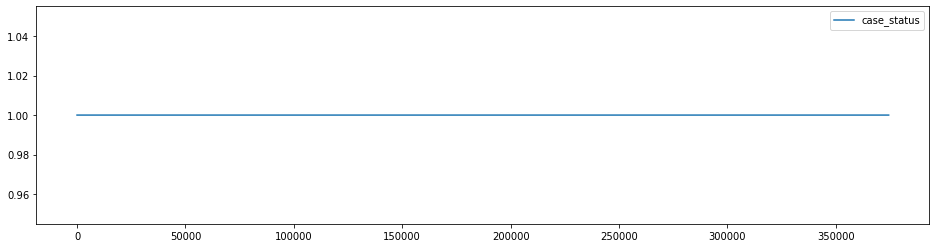

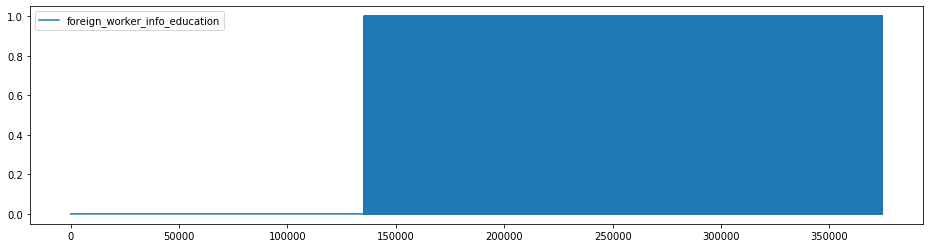

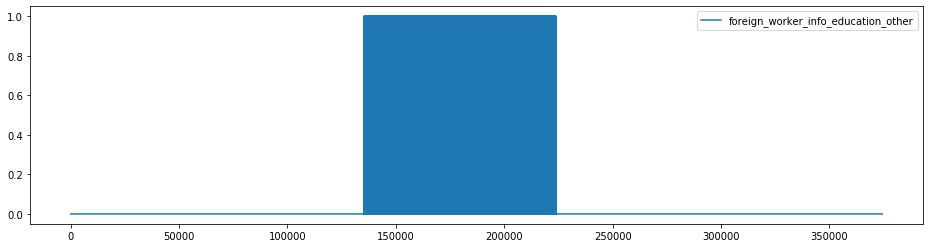

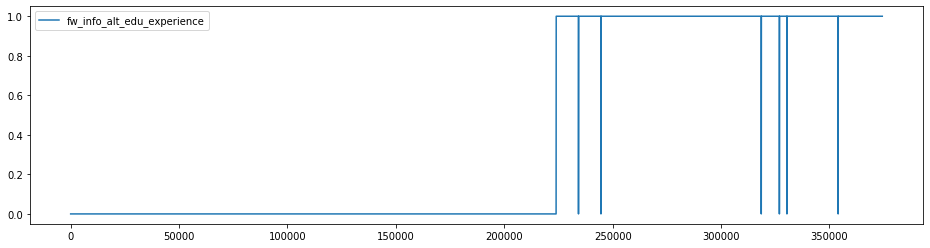

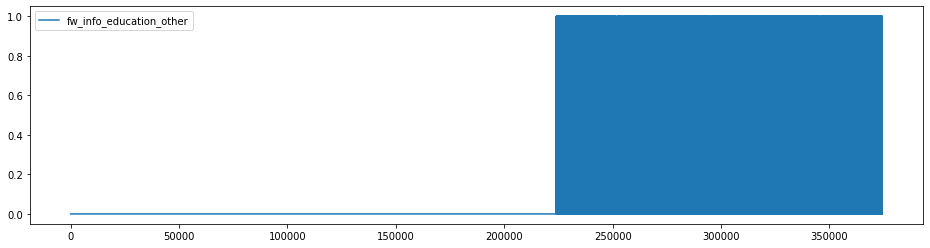

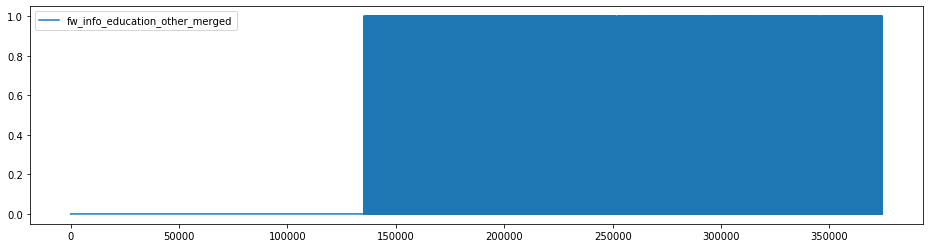

,case_status,foreign_worker_info_education,foreign_worker_info_education_other,fw_info_alt_edu_experience,fw_info_education_other,fw_info_education_other_merged
83244,Certified,NaN,NaN,NaN,NaN,NaN
61261,Denied,NaN,NaN,NaN,NaN,NaN
90328,Certified,NaN,NaN,NaN,NaN,NaN
217999,Certified,Bachelor's,NaN,NaN,NaN,NaN
144945,Denied,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
15954,Certified,NaN,NaN,NaN,NaN,NaN
163540,Certified-Expired,Master's,NaN,NaN,NaN,NaN
120094,Certified,NaN,NaN,NaN,NaN,NaN
339586,Certified,Bachelor's,NaN,A,NaN,NaN


In [11]:
visas_df['fw_info_education_other_merged'].value_counts()
modules.print_count_of_values_relation(visas_df, True, True)
visas_df.sample(100)

# Welcher Abschluss ist nun der häufigste:

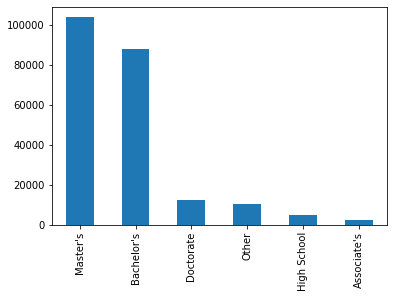

In [12]:
visas_df['foreign_worker_info_education'].value_counts()[:20].plot(kind='bar')

Die meisten haben einen Master oder einen Bachelor

## Welchen Abschluss haben die meisten Zusagen?

In [13]:
#Hier könnte man zwei Spalten auf die gleichen Werte vergleichen
#comparison_column = np.where(visas_df['foreign_worker_info_education'], visas_df['case_status'] == "Certified", True, False)

python compare two columns different values, Korrelation

In [14]:
#Hat nicht funktioniert
#np.corrcoef(visas_df['foreign_worker_info_education'], visas_df['case_status'])

In [15]:
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(visas_df['foreign_worker_info_education'], visas_df['case_status'])
plt.show()

NameError: name 'matplotlib' is not defined

In [ ]:
visas_df['foreign_worker_info_education'].corr(visas_df['case_status'])